<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Vision

### ImageDataset base class

In [1]:
#| echo: false
#| output: asis
show_doc(ImageDataset)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L21){target="_blank" style="float:right; font-size:smaller"}

### ImageDataset

>      ImageDataset ()

Base class for image datasets providing visualization of (image, label) samples

### MNIST

#### MNIST dataset

In [2]:
#| echo: false
#| output: asis
show_doc(MNISTDataset)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L58){target="_blank" style="float:right; font-size:smaller"}

### MNISTDataset

>      MNISTDataset (data_dir:str='~/Data', train=True, transform:<module'torchv
>                    ision.transforms.transforms'from'/home/syl20/anaconda3/envs
>                    /nimrod/lib/python3.9/site-
>                    packages/torchvision/transforms/transforms.py'>=ToTensor())

MNIST digit dataset

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data_dir | str | ~/Data | path where data is saved |
| train | bool | True | train or test dataset |
| transform | torchvision.transforms.transforms | ToTensor() | data formatting |

Number of samples in the dataset: 10000
torch.Size([1, 28, 28]) 7 torch.FloatTensor


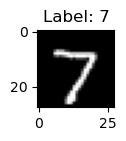

In [ ]:
ds = MNISTDataset('~/Data', train=False)
print(f"Number of samples in the dataset: {len(ds)}")
X, y = ds[0]
print(X.shape, y, X.type())
ds.show_idx(0)
train, dev = ds.train_dev_split(0.8)

#### MNIST DataModule

In [3]:
#| echo: false
#| output: asis
show_doc(MNISTDataModule)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L100){target="_blank" style="float:right; font-size:smaller"}

### MNISTDataModule

>      MNISTDataModule (data_dir:str='~/Data/',
>                       train_val_test_split:List[float]=[0.8, 0.1, 0.1],
>                       batch_size:int=64, num_workers:int=0,
>                       pin_memory:bool=False)

A DataModule standardizes the training, val, test splits, data preparation and transforms. The main
advantage is consistent data splits, data preparation and transforms across models.

Example::

    class MyDataModule(LightningDataModule):
        def __init__(self):
            super().__init__()
        def prepare_data(self):
            # download, split, etc...
            # only called on 1 GPU/TPU in distributed
        def setup(self, stage):
            # make assignments here (val/train/test split)
            # called on every process in DDP
        def train_dataloader(self):
            train_split = Dataset(...)
            return DataLoader(train_split)
        def val_dataloader(self):
            val_split = Dataset(...)
            return DataLoader(val_split)
        def test_dataloader(self):
            test_split = Dataset(...)
            return DataLoader(test_split)
        def teardown(self):
            # clean up after fit or test
            # called on every process in DDP

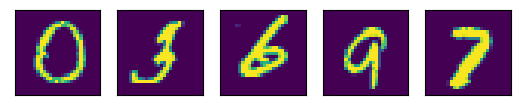

In [ ]:
dm = MNISTDataModule(
    data_dir="~/Data/",train_val_test_split=[0.8, 0.1, 0.1],
    batch_size = 64,
    num_workers = 0,
    pin_memory= False
)
dm.prepare_data()
dm.setup()
test_dl = dm.test_dataloader()
len(dm.data_test[0])
imgs = [dm.data_test[i][0] for i in range(5)]
ImageDataset.show_grid(imgs)

## Audio

### Speech-To-Text

#### Base class

In [4]:
#| echo: false
#| output: asis
show_doc(STTDataset)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L191){target="_blank" style="float:right; font-size:smaller"}

### STTDataset

>      STTDataset (tokenizer:lhotse.dataset.collation.TokenCollater,
>                  num_mel_bins:int=80)

An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs a index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| tokenizer | TokenCollater |  | text tokenizer |
| num_mel_bins | int | 80 | number of mel spectrogram bins |

#### LibriSpeech DataModule

In [5]:
#| echo: false
#| output: asis
show_doc(LibriSpeechDataModule)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L208){target="_blank" style="float:right; font-size:smaller"}

### LibriSpeechDataModule

>      LibriSpeechDataModule (target_dir='/data/en',
>                             dataset_parts='mini_librispeech',
>                             output_dir='../recipes/stt/librispeech/data',
>                             num_jobs=1)

A DataModule standardizes the training, val, test splits, data preparation and transforms. The main
advantage is consistent data splits, data preparation and transforms across models.

Example::

    class MyDataModule(LightningDataModule):
        def __init__(self):
            super().__init__()
        def prepare_data(self):
            # download, split, etc...
            # only called on 1 GPU/TPU in distributed
        def setup(self, stage):
            # make assignments here (val/train/test split)
            # called on every process in DDP
        def train_dataloader(self):
            train_split = Dataset(...)
            return DataLoader(train_split)
        def val_dataloader(self):
            val_split = Dataset(...)
            return DataLoader(val_split)
        def test_dataloader(self):
            test_split = Dataset(...)
            return DataLoader(test_split)
        def teardown(self):
            # clean up after fit or test
            # called on every process in DDP

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| target_dir | str | /data/en | where data will be saved / retrieved |
| dataset_parts | str | mini_librispeech | either full librispeech or mini subset |
| output_dir | str | ../recipes/stt/librispeech/data | where to save manifest |
| num_jobs | int | 1 | num_jobs depending on number of cpus available |

In [ ]:
dm = LibriSpeechDataModule(
    target_dir="../data/en", 
    dataset_parts="mini_librispeech",
    output_dir="../data/en/LibriSpeech/dev-clean-2",
    num_jobs=1
)

In [ ]:
# skip this at export time to not waste time
# download
# dm.prepare_data()

In [ ]:
dm.setup(stage='test')

Dataset parts: 100%|██████████| 1/1 [00:00<00:00, 30.79it/s]


In [ ]:
recs = RecordingSet.from_file("../data/en/LibriSpeech/dev-clean-2/librispeech_recordings_dev-clean-2.jsonl.gz")
len(recs)

25

In [ ]:
sup = SupervisionSet("../data/en/LibriSpeech/dev-clean-2/librispeech_supervisions_dev-clean-2.jsonl.gz")
len(sup)

80

In [ ]:
test_dl = dm.test_dataloader()
b = next(iter(test_dl))
print(b["feats_pad"].shape, b["tokens_pad"].shape, b["ilens"].shape)
# plt.imshow(b["feats_pad"][0].transpose(0,1), origin='lower')

# dm.tokenizer.idx2token(b["tokens_pad"][0])
# dm.tokenizer.inverse(b["tokens_pad"][0], b["ilens"][0])

torch.Size([1, 1113, 80]) torch.Size([1, 163]) torch.Size([1])


In [ ]:
dm.cuts_test

CutSet(len=25) [underlying data type: <class 'dict'>]

<AxesSubplot: >

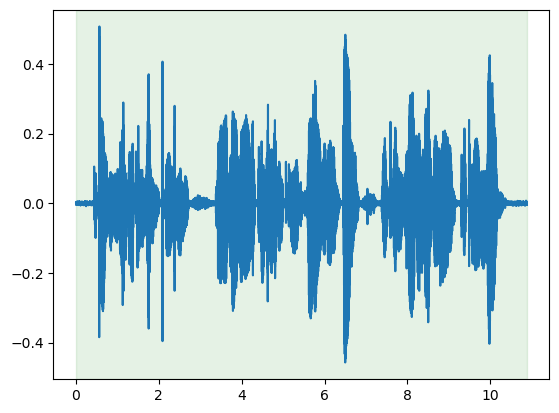

In [ ]:
cut = dm.cuts_test[0]
# pprint(cut.to_dict())
cut.plot_audio()

### Text-To-Speech

#### Base Class

In [6]:
#| echo: false
#| output: asis
show_doc(TTSDataset)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L251){target="_blank" style="float:right; font-size:smaller"}

### TTSDataset

>      TTSDataset (tokenizer:lhotse.dataset.collation.TokenCollater,
>                  num_mel_bins:int=80)

An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs a index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| tokenizer | TokenCollater |  | text tokenizer |
| num_mel_bins | int | 80 | number of mel spectrogram bins |

#### LJSpeech DataModule

In [7]:
#| echo: false
#| output: asis
show_doc(LJSpeechDataModule)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L267){target="_blank" style="float:right; font-size:smaller"}

### LJSpeechDataModule

>      LJSpeechDataModule (target_dir='/data/en',
>                          dataset_parts='mini_librispeech',
>                          output_dir='../recipes/tts/ljspeech/data')

A DataModule standardizes the training, val, test splits, data preparation and transforms. The main
advantage is consistent data splits, data preparation and transforms across models.

Example::

    class MyDataModule(LightningDataModule):
        def __init__(self):
            super().__init__()
        def prepare_data(self):
            # download, split, etc...
            # only called on 1 GPU/TPU in distributed
        def setup(self, stage):
            # make assignments here (val/train/test split)
            # called on every process in DDP
        def train_dataloader(self):
            train_split = Dataset(...)
            return DataLoader(train_split)
        def val_dataloader(self):
            val_split = Dataset(...)
            return DataLoader(val_split)
        def test_dataloader(self):
            test_split = Dataset(...)
            return DataLoader(test_split)
        def teardown(self):
            # clean up after fit or test
            # called on every process in DDP

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| target_dir | str | /data/en | where data will be saved / retrieved |
| dataset_parts | str | mini_librispeech | either full librispeech or mini subset |
| output_dir | str | ../recipes/tts/ljspeech/data | where to save manifest |

#### LibriTTS DataModule

In [8]:
#| echo: false
#| output: asis
show_doc(LibriTTSDataModule)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L305){target="_blank" style="float:right; font-size:smaller"}

### LibriTTSDataModule

>      LibriTTSDataModule (target_dir='/data/en/libriTTS', dataset_parts=['dev-
>                          clean', 'test-clean'], output_dir='/home/syl20/slg/ni
>                          mrod/recipes/libritts/data', num_jobs=1)

A DataModule standardizes the training, val, test splits, data preparation and transforms. The main
advantage is consistent data splits, data preparation and transforms across models.

Example::

    class MyDataModule(LightningDataModule):
        def __init__(self):
            super().__init__()
        def prepare_data(self):
            # download, split, etc...
            # only called on 1 GPU/TPU in distributed
        def setup(self, stage):
            # make assignments here (val/train/test split)
            # called on every process in DDP
        def train_dataloader(self):
            train_split = Dataset(...)
            return DataLoader(train_split)
        def val_dataloader(self):
            val_split = Dataset(...)
            return DataLoader(val_split)
        def test_dataloader(self):
            test_split = Dataset(...)
            return DataLoader(test_split)
        def teardown(self):
            # clean up after fit or test
            # called on every process in DDP

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| target_dir | str | /data/en/libriTTS | where data will be saved / retrieved |
| dataset_parts | list | ['dev-clean', 'test-clean'] | either full libritts or subset |
| output_dir | str | /home/syl20/slg/nimrod/recipes/libritts/data | where to save manifest |
| num_jobs | int | 1 | num_jobs depending on number of cpus available |

In [ ]:
dm = LibriTTSDataModule(
    target_dir="../data/en", 
    dataset_parts="test-clean",
    output_dir="../data/en/LibriTTS/test-clean",
    num_jobs=1
)

In [ ]:
# skip download and use local data folder
# dm.prepare_data()

In [ ]:
dm.setup(stage='test')

Scanning audio files (*.wav): 0it [00:00, ?it/s]00:00<?, ?it/s]
Scanning audio files (*.wav): 0it [00:00, ?it/s]
Scanning audio files (*.wav): 95it [00:00, 9890.75it/s]
Scanning audio files (*.wav): 0it [00:00, ?it/s]
Scanning audio files (*.wav): 0it [00:00, ?it/s]
Scanning audio files (*.wav): 0it [00:00, ?it/s]
Scanning audio files (*.wav): 0it [00:00, ?it/s]00:00<00:00, 58.56it/s]
Preparing LibriTTS parts: 100%|██████████| 7/7 [00:00<00:00, 60.58it/s]


## Test Lhotse STT & TTS

In [ ]:
dm = LibriSpeechDataModule(
    target_dir="../data/en", 
    dataset_parts="mini_librispeech",
    output_dir="../data/en/LibriSpeech/dev-clean-2",
    num_jobs=1
)

In [ ]:
dm.setup(stage='test')
print(dm.libri)

Dataset parts: 100%|██████████| 1/1 [00:00<00:00, 33.30it/s]

{'dev-clean-2': {'recordings': RecordingSet(len=25), 'supervisions': SupervisionSet(len=25)}}


In [ ]:
set_dev = CutSet.from_manifests(**dm.libri["dev-clean-2"])

In [ ]:
print(set_dev[0])

MonoCut(id='1272-135031-0000-0', start=0, duration=10.885, channel=0, supervisions=[SupervisionSegment(id='1272-135031-0000', recording_id='1272-135031-0000', start=0.0, duration=10.885, channel=0, text='BECAUSE YOU WERE SLEEPING INSTEAD OF CONQUERING THE LOVELY ROSE PRINCESS HAS BECOME A FIDDLE WITHOUT A BOW WHILE POOR SHAGGY SITS THERE A COOING DOVE', language='English', speaker='1272', gender=None, custom=None, alignment=None)], features=None, recording=Recording(id='1272-135031-0000', sources=[AudioSource(type='file', channels=[0], source='../data/en/LibriSpeech/dev-clean-2/1272/135031/1272-135031-0000.flac')], sampling_rate=16000, num_samples=174160, duration=10.885, channel_ids=[0], transforms=None), custom=None)


<AxesSubplot: >

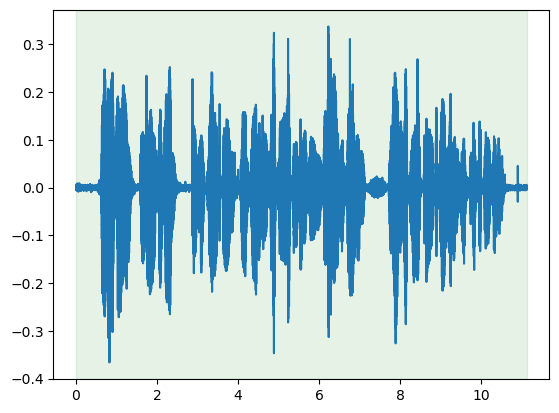

In [ ]:
set_dev[1].plot_audio()

Extracting and storing features (chunks progress): 100%|██████████| 110/110 [00:00<00:00, 226.04it/s]


MonoCut(id='1272-135031-0000-0', start=0, duration=10.885, channel=0, supervisions=[SupervisionSegment(id='1272-135031-0000', recording_id='1272-135031-0000', start=0.0, duration=10.885, channel=0, text='BECAUSE YOU WERE SLEEPING INSTEAD OF CONQUERING THE LOVELY ROSE PRINCESS HAS BECOME A FIDDLE WITHOUT A BOW WHILE POOR SHAGGY SITS THERE A COOING DOVE', language='English', speaker='1272', gender=None, custom=None, alignment=None)], features=Features(type='kaldi-fbank', num_frames=1089, num_features=80, frame_shift=0.01, sampling_rate=16000, start=0, duration=10.885, storage_type='lilcom_chunky', storage_path='/tmp/feats-train/feats-0.lca', storage_key='0,45657,45174,7993', recording_id='None', channels=0), recording=Recording(id='1272-135031-0000', sources=[AudioSource(type='file', channels=[0], source='../data/en/LibriSpeech/dev-clean-2/1272/135031/1272-135031-0000.flac')], sampling_rate=16000, num_samples=174160, duration=10.885, channel_ids=[0], transforms=None), custom=None)


<matplotlib.image.AxesImage>

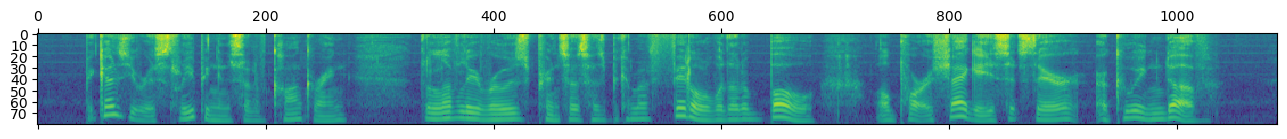

In [ ]:
torch.set_num_threads(1) #root:num_jobs is > 1 and torch's number of threads is > 1 as well: For certain configs this can result in a never ending computation. If this happens, use torch.set_num_threads(1) to circumvent this.
extractor = Fbank() # Mfcc()
set_dev_feat = set_dev.compute_and_store_features(
    extractor, "/tmp/feats-train", num_jobs=110
)
print(set_dev_feat[0])
set_dev_feat[0].plot_features()

In [ ]:
set_dev[0].play_audio()

In [ ]:
def text_normalizer(segment: SupervisionSegment) -> SupervisionSegment:
    text = segment.text.upper()
    text = re.sub(r'[^\w !?]', '', text)
    text = re.sub(r'^\s+', '', text)
    text = re.sub(r'\s+$', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return fastcopy(segment, text=text)

In [ ]:
set_dev_feat_norm = set_dev_feat.map_supervisions(text_normalizer)

set_dev_feat_norm.to_json(Path('/tmp') / f'cuts.json.gz')
ljspeech_manifests = {}
ljspeech_manifests['cuts'] = set_dev_feat_norm
set_dev_feat_norm[0]

MonoCut(id='1272-135031-0000-0', start=0, duration=10.885, channel=0, supervisions=[SupervisionSegment(id='1272-135031-0000', recording_id='1272-135031-0000', start=0.0, duration=10.885, channel=0, text='because you were sleeping instead of conquering the lovely rose princess has become a fiddle without a bow while poor shaggy sits there a cooing dove', language='English', speaker='1272', gender=None, custom=None, alignment=None)], features=Features(type='kaldi-fbank', num_frames=1089, num_features=80, frame_shift=0.01, sampling_rate=16000, start=0, duration=10.885, storage_type='lilcom_chunky', storage_path='/tmp/feats-train/feats-0.lca', storage_key='0,45657,45174,7993', recording_id='None', channels=0), recording=Recording(id='1272-135031-0000', sources=[AudioSource(type='file', channels=[0], source='../data/en/LibriSpeech/dev-clean-2/1272/135031/1272-135031-0000.flac')], sampling_rate=16000, num_samples=174160, duration=10.885, channel_ids=[0], transforms=None), custom=None)

In [ ]:
cuts = set_dev_feat_norm

feature_transforms=[
        # SpecAugment(),  # default configuration is well-tuned
        GlobalMVN(80)
    ]
feature_input_strategy=OnTheFlyFeatures(Fbank())

dataset = SpeechSynthesisDataset(
    ljspeech_manifests['cuts'],
    # cut_transforms=[transform(cuts)],
    feature_input_strategy=feature_input_strategy,
    feature_transforms=feature_transforms
)

In [ ]:
print(dataset[set_dev_feat_norm]['audio'].shape)
print(dataset[set_dev_feat_norm]['features'].shape)
print(dataset[set_dev_feat_norm]['tokens'].shape)
print(dataset[set_dev_feat_norm]['audio_lens'].shape)
print(dataset[set_dev_feat_norm]['features_lens'].shape)
print(dataset[set_dev_feat_norm]['tokens_lens'].shape)

/home/syl20/anaconda3/envs/nimrod/lib/python3.9/site-packages/lhotse/lazy.py:413: UserWarning: A lambda was passed to LazyMapper: it may prevent you from forking this process. If you experience issues with num_workers > 0 in torch.utils.data.DataLoader, try passing a regular function instead.
  warnings.warn(


torch.Size([25, 231520])
torch.Size([25, 1447, 80])
torch.Size([25, 214])
torch.Size([25])
torch.Size([25])
torch.Size([25])


In [ ]:
# DynamicBucketingSampler
train_sampler = DynamicBucketingSampler(
    set_dev_feat_norm,
    shuffle=True,
    max_duration=100.0,
    num_buckets=10,
)

In [ ]:
ds = dataset[set_dev_feat_norm]
dl = DataLoader(
    dataset,
    sampler=train_sampler,
    batch_size=None,
    num_workers=110,  # For faster dataloading, use num_workers > 1
)

/home/syl20/anaconda3/envs/nimrod/lib/python3.9/site-packages/lhotse/lazy.py:413: UserWarning: A lambda was passed to LazyMapper: it may prevent you from forking this process. If you experience issues with num_workers > 0 in torch.utils.data.DataLoader, try passing a regular function instead.
  warnings.warn(


In [ ]:
sample = next(iter(dl))

In [ ]:
print(sample.keys())

dict_keys(['audio', 'features', 'tokens', 'audio_lens', 'features_lens', 'tokens_lens'])


<matplotlib.image.AxesImage>

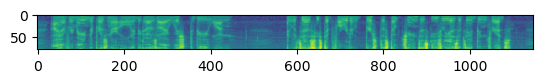

In [ ]:
plt.imshow(torch.transpose(sample['features'][0], 0,1))

In [ ]:
train_dataset = K2SpeechRecognitionDataset(
    cut_transforms=[
        PerturbSpeed(factors=[0.9, 1.1], p=2 / 3),
        PerturbVolume(scale_low=0.125, scale_high=2.0, p=0.5),
    ],
    input_transforms=[
        SpecAugment(),  # default configuration is well-tuned
    ],
    input_strategy=OnTheFlyFeatures(Fbank()),
)

In [ ]:
ds = train_dataset[set_dev]

In [ ]:
print(ds['supervisions'].keys())
print(ds['inputs'].shape)

dict_keys(['text', 'sequence_idx', 'start_frame', 'num_frames'])
torch.Size([25, 1608, 80])


In [ ]:
dl = DataLoader(
    train_dataset,
    sampler=train_sampler,
    batch_size=None,
    num_workers=110,  # For faster dataloading, use num_workers > 1
)

In [ ]:
next(iter(dl))

{'inputs': tensor([[[-11.1812, -10.9739, -12.5455,  ...,  -5.5773,  -6.4572,  -5.3041],
          [-10.3855,  -9.8523, -10.5708,  ...,  -6.3980,  -6.1359,  -4.6375],
          [-10.9408,  -9.8240, -10.3110,  ...,  -6.6965,  -6.0713,  -5.5296],
          ...,
          [-10.8166,  -9.3418,  -8.9698,  ...,  -6.3168,  -7.0967,  -7.0158],
          [-10.2726,  -9.3132, -13.9735,  ...,  -6.7106,  -7.1200,  -7.3640],
          [-10.9128, -11.3037,  -9.5023,  ...,  -6.9619,  -7.6213,  -7.3471]]]),
 'supervisions': {'text': ['HE HAS GONE AND GONE FOR GOOD ANSWERED POLYCHROME WHO HAD MANAGED TO SQUEEZE INTO THE ROOM BESIDE THE DRAGON AND HAD WITNESSED THE OCCURRENCES WITH MUCH INTEREST'],
  'sequence_idx': tensor([0], dtype=torch.int32),
  'start_frame': tensor([0], dtype=torch.int32),
  'num_frames': tensor([1012], dtype=torch.int32)}}

In [ ]:
ds['inputs'][0].shape

torch.Size([1608, 80])

<matplotlib.image.AxesImage>

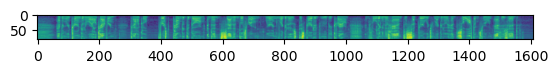

In [ ]:
plt.imshow(torch.transpose(ds['inputs'][0],0,1))

In [ ]:
sample = next(iter(dl))

In [ ]:
sample.keys()

dict_keys(['inputs', 'supervisions'])

In [ ]:
sample['inputs'].shape

torch.Size([1, 1012, 80])

<matplotlib.image.AxesImage>

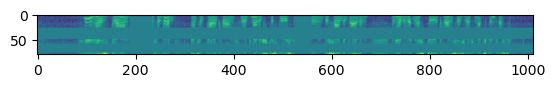

In [ ]:
# plt.imshow(torch.transpose(sample['inputs'].squeeze(0), 0, 1))

In [ ]:
sample['supervisions']

{'text': ['HE HAS GONE AND GONE FOR GOOD ANSWERED POLYCHROME WHO HAD MANAGED TO SQUEEZE INTO THE ROOM BESIDE THE DRAGON AND HAD WITNESSED THE OCCURRENCES WITH MUCH INTEREST'],
 'sequence_idx': tensor([0], dtype=torch.int32),
 'start_frame': tensor([0], dtype=torch.int32),
 'num_frames': tensor([1012], dtype=torch.int32)}

In [ ]:
len("HE HAS GONE AND GONE FOR GOOD ANSWERED POLYCHROME WHO HAD MANAGED TO SQUEEZE INTO THE ROOM BESIDE THE DRAGON AND HAD WITNESSED THE OCCURRENCES WITH MUCH INTEREST")

161